In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
import plotly.express as px
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import random
from sklearn import metrics



Read in and clean data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Group 3 Inventors Program Project/Data Sets/rodpump_failure.csv')
data

,roduid,UWI,NODEID,IDWELL,tbguid,lifetime_start,lifetime_end,IDRECJOBPULL,REPORTTO,FAILSTART,...,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,DESANDDEGAS_TYP,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore,gasanchor_od
0,GB27GKBE51029074693667,175-58-0111,box-child-doctor,GPVO63973435661154,GB55QFGB46756147811400,2014-05-02 00:00:00.000,2019-01-04 10:00:00.000,FGNB86581338411987,Tubing,2018-12-11 00:00:00.000,...,NaN,NaN,NaN,UNKNOWN,0.0,0.00,0.0,10024.8,1.5,NaN
1,GB53OEVX46438297645035,333-68-3523,outside-worry,ZAYT33358197650329,GB29QCCC14341267287129,2018-01-28 14:00:00.000,2019-05-17 12:00:00.000,XRYU81281518151403,Tubing,2019-04-01 00:00:00.000,...,179.44,179.44,179.44,Miller LLC,0.0,0.00,0.0,10235.6,1.5,3.5
2,GB95BPWW35640301552066,165-51-5897,near-learn-simply,FNVL11432909873086,GB02DJAW44801752494129,2011-09-14 00:00:00.000,2012-08-20 00:00:00.000,PLPR44121073149707,Sucker Rod Pump,2012-08-01 00:00:00.000,...,105.76,105.76,105.76,Miller LLC,0.0,0.00,0.0,10401.9,1.5,NaN
3,GB79UEDN31454825972680,543-56-3494,sea-improve-place,JOKL33317998159514,GB84GHPH97287631470412,2016-01-12 09:00:00.000,2017-03-16 16:30:00.000,MYCF04792093856141,Sucker Rod Pump,2017-01-19 00:00:00.000,...,98.18,47.96,98.18,Miller LLC,0.0,0.00,0.0,9557.7,1.75,4.5
4,GB20XCTM13691331349509,391-37-2039,personal-candidate,XOSU92041716672870,GB08VYTX61977431827206,2018-06-14 13:00:00.000,2020-04-15 17:37:11.338,WJDB83445325478746,NaN,NaN,...,266.68,266.68,170.99,Miller LLC,0.0,129.39,0.0,9681.7,1.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,GB74QISK75341223174934,454-02-0835,raise-itself-others,ZGUQ28062273906385,GB29BARQ28938453348107,2010-10-29 00:00:00.000,2012-10-04 00:00:00.000,WJDB83445325478746,NaN,NaN,...,96.58,96.58,96.58,Sanchez PLC,0.0,0.00,0.0,9708.4,1.5,OtherOrUnknown
2592,GB75FIRZ53489602517781,289-32-8553,effect-hand-bill,JDXM01407042746495,GB33RCVQ79658159128646,2012-03-19 00:00:00.000,2013-05-21 00:00:00.000,WJDB83445325478746,NaN,NaN,...,61.66,61.66,61.66,Sanchez PLC,0.0,0.00,0.0,9904.4,1.5,2.875
2593,GB54JAPU86068543576293,398-34-2865,manage-force-tv,UUDX23191327424070,GB90WEAA57424793540399,2018-11-21 10:00:00.000,2019-01-03 08:00:00.000,KMDU32603777743629,Rods,2018-12-03 00:00:00.000,...,164.65,164.65,121.77,West-Washington,0.0,65.35,0.0,9014.5,1.75,2.875
2594,GB72HWVC93865937237796,354-39-2775,wide-recently-star,BTGV75021760350137,GB34QQIL39644388829912,2013-05-17 00:00:00.000,2013-06-18 00:00:00.000,FVGJ49544944366169,Sucker Rod Pump,2013-06-01 00:00:00.000,...,NaN,NaN,NaN,UNKNOWN,0.0,0.00,0.0,9532.2,1.5,NaN


In [ ]:
filters = ['FAILURETYPE', 'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME']
tags = ['Not Failure', 'Failure']

data['FAILURETYPE'] = data['FAILURETYPE'].replace(np.nan, 'Not Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Tubing', 'Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Sucker Rod Pump', 'Failure')
data['FAILURETYPE'] = data['FAILURETYPE'].replace('Rods', 'Failure')
data = data.replace('Other', 0)
data = data.replace(np.nan, 0)
min_length = min(list(data['FAILURETYPE'].value_counts(dropna=False)))

In [ ]:

filtered_data = data[filters]



In [ ]:

numbered_labels = []
for i in range(len(filtered_data)):
  numbered_labels.append(tags.index(filtered_data.values[i][0]))

In [ ]:
input_data = []
for i in range(len(filtered_data)):
  input_data.append(filtered_data.values[i][1:])

In [ ]:
input_data = np.array(input_data)

scaler = MinMaxScaler(feature_range=(-1,1))
input_data = scaler.fit_transform(input_data)


numbered_labels = np.array(numbered_labels)

X_train, X_test, y_train, y_test = train_test_split(input_data, numbered_labels, test_size=0.2, random_state = 3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2076, 2) (520, 2) (2076,) (520,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6710019267822736


In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6557692307692308


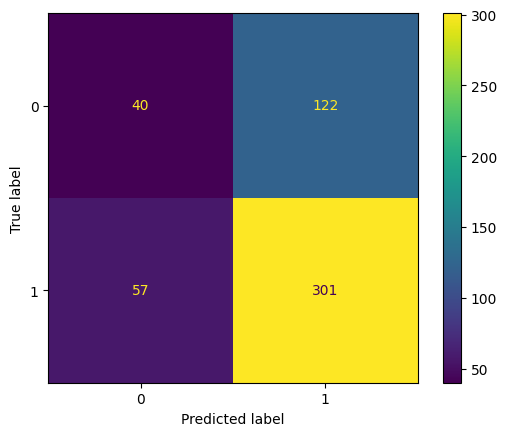

In [ ]:

confusion_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


Text(0, 0.5, 'Accuracy Score')

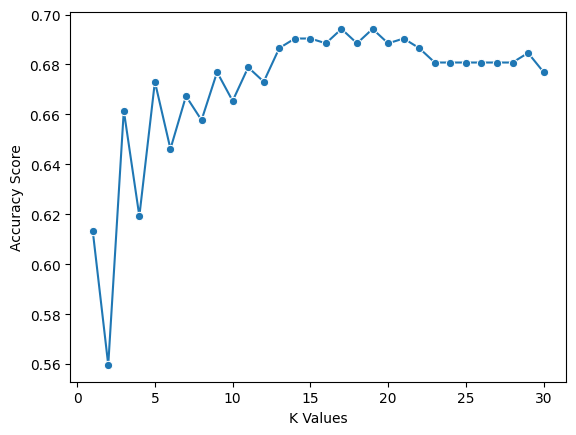

In [ ]:
k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_test, y_test, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
input_data = np.array(input_data)

scaler = MinMaxScaler(feature_range=(-1,1))
input_data = scaler.fit_transform(input_data)

numbered_labels = np.array(numbered_labels)
scores= []
for i in range(0, 100):
  X_train, X_test, y_train, y_test = train_test_split(input_data, numbered_labels, test_size=0.2, random_state = i)
  knn = KNeighborsClassifier(n_neighbors=20)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  scores.append(accuracy)
  print("Accuracy:", accuracy)

Accuracy: 0.6576923076923077
Accuracy: 0.6519230769230769
Accuracy: 0.6480769230769231
Accuracy: 0.6557692307692308
Accuracy: 0.7
Accuracy: 0.6826923076923077
Accuracy: 0.6326923076923077
Accuracy: 0.65
Accuracy: 0.6288461538461538
Accuracy: 0.6538461538461539
Accuracy: 0.6096153846153847
Accuracy: 0.6788461538461539
Accuracy: 0.6711538461538461
Accuracy: 0.6384615384615384
Accuracy: 0.6576923076923077
Accuracy: 0.6211538461538462
Accuracy: 0.6615384615384615
Accuracy: 0.6173076923076923
Accuracy: 0.6692307692307692
Accuracy: 0.6403846153846153
Accuracy: 0.6615384615384615
Accuracy: 0.6480769230769231
Accuracy: 0.6307692307692307
Accuracy: 0.6384615384615384
Accuracy: 0.7038461538461539
Accuracy: 0.6288461538461538
Accuracy: 0.6423076923076924
Accuracy: 0.625
Accuracy: 0.6673076923076923
Accuracy: 0.6326923076923077
Accuracy: 0.6346153846153846
Accuracy: 0.6615384615384615
Accuracy: 0.6230769230769231
Accuracy: 0.6211538461538462
Accuracy: 0.675
Accuracy: 0.6615384615384615
Accuracy: 0

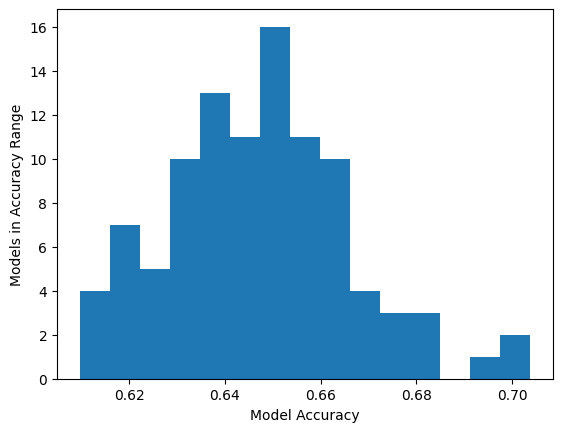

In [ ]:
plt.hist(scores, 15)
plt.xlabel("Model Accuracy")
plt.ylabel("Models in Accuracy Range")
plt.show()

In [ ]:
import scipy.stats as st

st.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores), scale=st.sem(scores))


<ipython-input-16-f4a047684325>:3: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(scores)-1, loc=np.mean(scores), scale=st.sem(scores))


(0.6432082340215894, 0.6507148429014875)

plot cdf of accuracy values
take mean accuracy of model and have std deviation

